In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm 
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
#import the file 
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [3]:
# checking the missing values
boston_df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

In [4]:
# check the data no of row, columns and data types in complete the dataset
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [5]:
# summary statitics 
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


C:\Users\koyen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3000x3000 with 0 Axes>

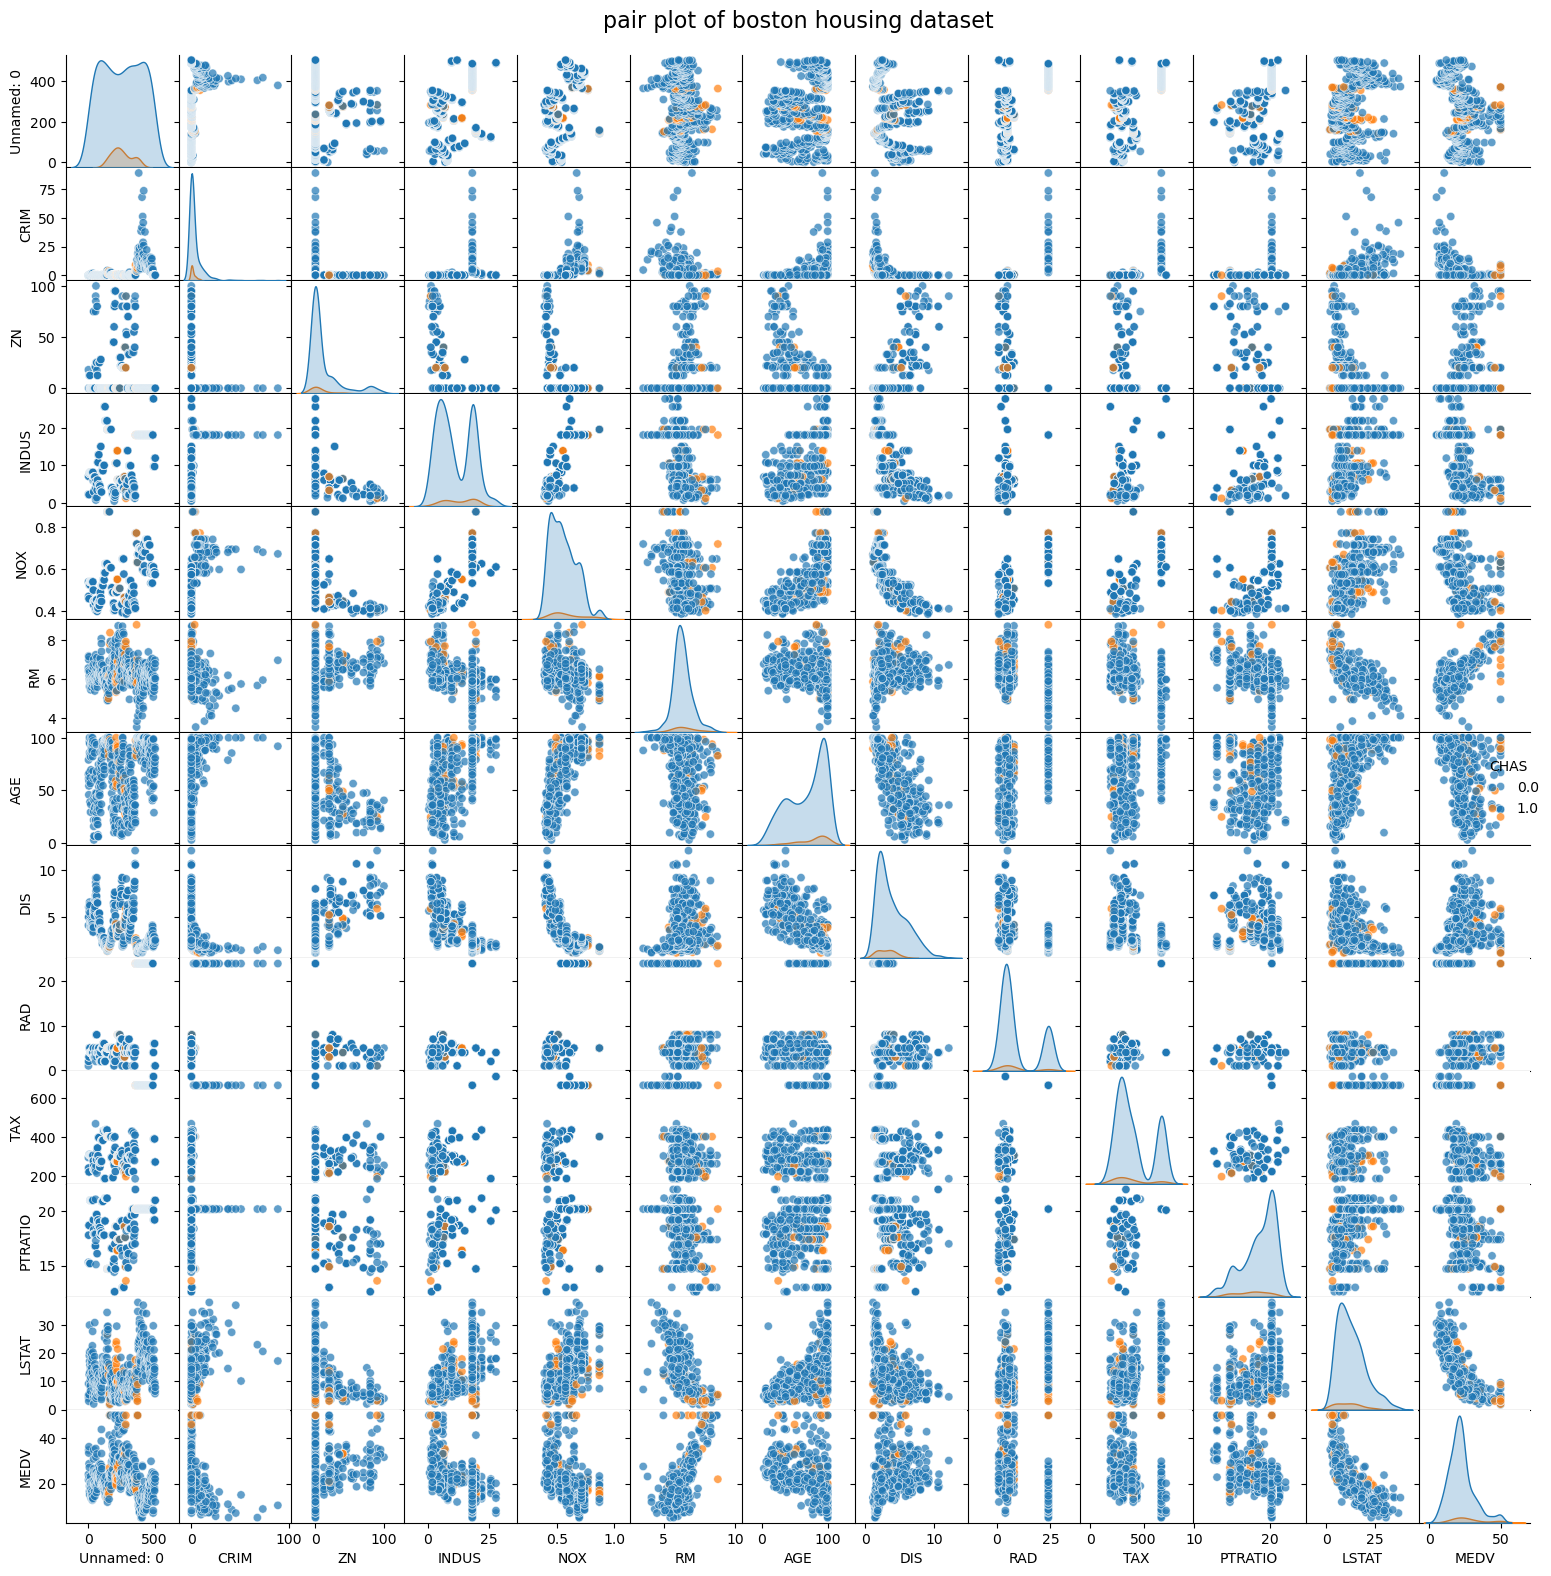

In [6]:
#inspecting feature 
# pairplot for inital exploration 
plt.figure(figsize=(30,30))
pp=sns.pairplot(boston_df,height=30,plot_kws={"alpha":0.7},diag_kws={"color":"blue"},hue="CHAS")
pp.fig.suptitle("pair plot of boston housing dataset",y=1.02, fontsize=16)
pp.fig.set_size_inches(15,15)
plt.show()

# conclusion 
- Homes with more rooms, higher distance from employment centers, and lower crime rates are more valuable.
- Industrial activity correlates with higher pollution, which might negatively impact home values in some cases.
- Charles River proximity seems to play a role in increasing property value, though this effect isn't dominant across all variables.

# step2 data cleaning and preparation 

In [7]:
# droping the unnamed row as it is a indexing row
df=boston_df.drop(columns=(["Unnamed: 0"]))
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [8]:
# outlier detecting 
from scipy.stats import zscore

z_sorce=df.apply(zscore)

outliers=(z_sorce>3)|(z_sorce<-3)
print(outliers.sum())

CRIM        8
ZN         14
INDUS       0
CHAS       35
NOX         0
RM          8
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO     0
LSTAT       5
MEDV        0
dtype: int64


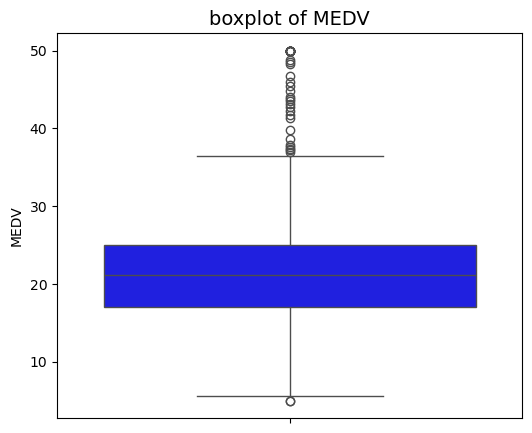

In [9]:
plt.figure(figsize=(6,5))
sns.boxplot(y=df["MEDV"],color="blue")
plt.title("boxplot of MEDV",fontsize=(14))
plt.show()

C:\Users\koyen\AppData\Local\Temp\ipykernel_181036\4292527895.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chas_counts.index.astype(str), y=chas_counts.values, palette='viridis')


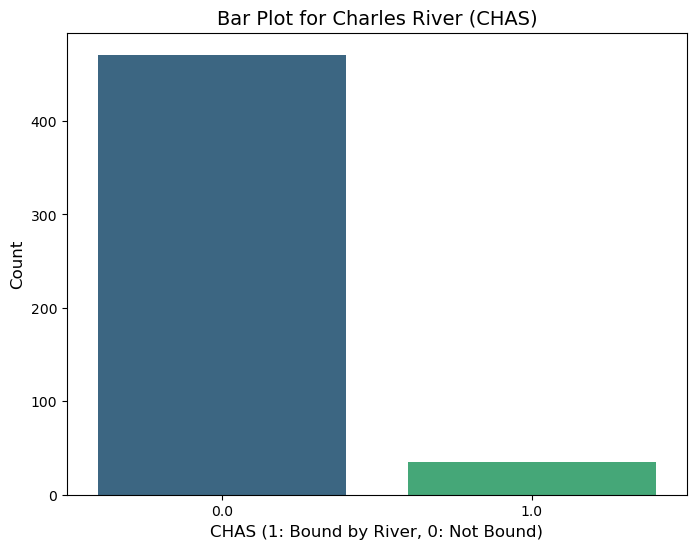

In [10]:
# Get counts of CHAS categories
chas_counts = df['CHAS'].value_counts().sort_index()

# Ensure the index matches the expected values (0 and 1)
plt.figure(figsize=(8, 6))
sns.barplot(x=chas_counts.index.astype(str), y=chas_counts.values, palette='viridis')
plt.title('Bar Plot for Charles River (CHAS)', fontsize=14)
plt.xlabel('CHAS (1: Bound by River, 0: Not Bound)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


# very few house are near to charles river 

In [12]:
df["CHAS"].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

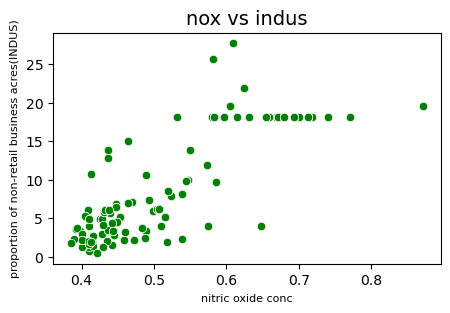

In [13]:
#scatter plot for nox vs indus
plt.figure(figsize=(5,3))
sns.scatterplot(x=df["NOX"],y=df["INDUS"],color="green")
plt.title("nox vs indus", fontsize=14)
plt.xlabel("nitric oxide conc", fontsize=8)
plt.ylabel("proportion of non-retail business acres(INDUS)", fontsize=8)
plt.show()

# this graph signify that air population is higher in industrial area but in graph found the cluster is around 0.4-0.5 and below 10 which signify low air polution 

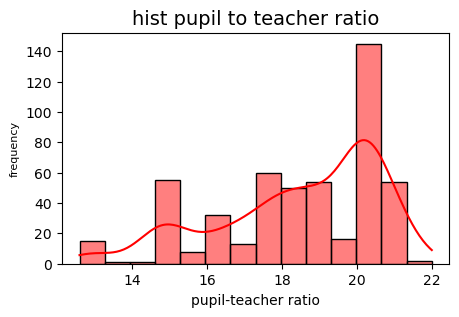

In [15]:
#hist for pupil - teacher ratio

plt.figure(figsize=(5,3))
sns.histplot(data=df["PTRATIO"],kde=True,color="red")
plt.title("hist pupil to teacher ratio", fontsize=14)
plt.ylabel("frequency",fontsize=8)
plt.xlabel("pupil-teacher ratio")
plt.show()

# this graph signifies that the data is right skewed and value is concentrated between 18-22 , indicated that pupil to techer ratio is higher in many areas

In [17]:
#checking the max and min value of the column to catgories
df["AGE"].min()

2.9

C:\Users\koyen\AppData\Local\Temp\ipykernel_181036\2368921644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="age_group",y="MEDV",palette="Set2")


Text(0, 0.5, 'MEDV')

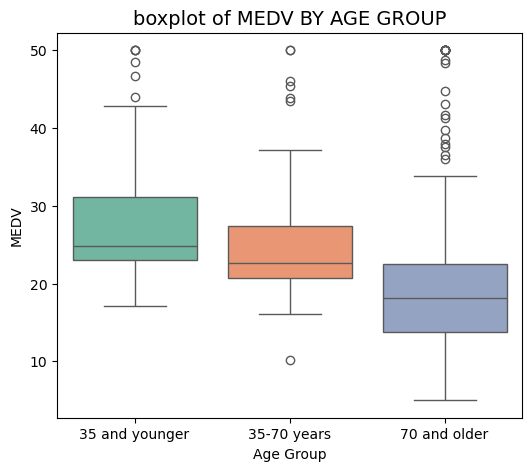

In [18]:
# boxplot of MEDV vs AGE
df["age_group"]=pd.cut(df["AGE"],bins=[0,35,70,200],labels=["35 and younger","35-70 years","70 and older"])
plt.figure(figsize=(6,5))
sns.boxplot(data=df,x="age_group",y="MEDV",palette="Set2")
plt.title("boxplot of MEDV BY AGE GROUP",fontsize="14")
plt.xlabel("Age Group",fontsize="10")
plt.ylabel("MEDV",fontsize="10")

# this plot signifies that new constrution (35 and younger)have higher values that older ones due to may be several factor like modern ammenities ,rigid structure, location 

# step 4 statistical testing 


# 1)T-Test: Is there a significant difference in the median value of houses bounded by the Charles River?
- T-tests are suitable when comparing means between 
two independent groups (e.g., CHAS = 1 vs CHAS = 0).
- We assume the data is normally distributed or 
large enough for the Central Limit Theorem to apply.

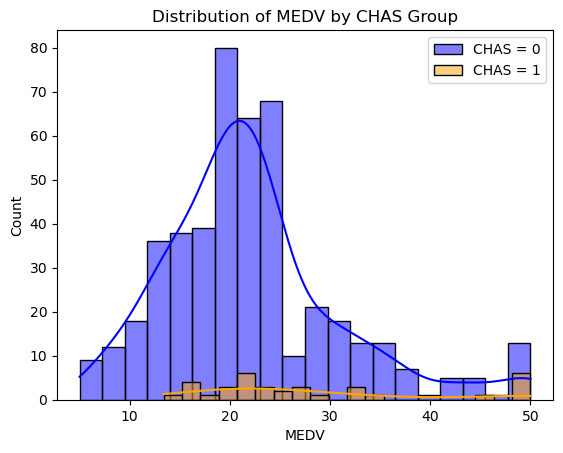

In [20]:
# check the normality of the feature CHAS 
chas_0 = df[df['CHAS'] == 0]['MEDV']
chas_1 = df[df['CHAS'] == 1]['MEDV']
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(chas_0, kde=True, color="blue", label="CHAS = 0", bins=20)
sns.histplot(chas_1, kde=True, color="orange", label="CHAS = 1", bins=20)
plt.legend()
plt.title("Distribution of MEDV by CHAS Group")
plt.show()

In [21]:
from scipy.stats import shapiro

print("Normality Test for CHAS=0:", shapiro(chas_0))
print("Normality Test for CHAS=1:", shapiro(chas_1))

Normality Test for CHAS=0: ShapiroResult(statistic=0.9282609224319458, pvalue=3.1142707905768355e-14)
Normality Test for CHAS=1: ShapiroResult(statistic=0.8359234929084778, pvalue=0.00011230999371036887)


- The null hypothesis for the Shapiro-Wilk test is: "The data follows a normal distribution."
- Since both p-values are less than 0.05, we reject the null hypothesis for both groups. This means:
- The MEDV values are not normally distributed for both CHAS = 0 and CHAS = 1.
- since the shapiro wilk test shows that data is not normarlly disturbed so cant use a parametric test for comparison , so we will use non para,etric mann whitey test 

- Null Hypothesis : The variances of the groups are equal (homogeneity of variance).
- Alternative Hypothesis : The variances of the groups are not equal (heterogeneity of variance).

In [22]:
from scipy.stats import levene

variance_test=levene(chas_0,chas_1,center="median")

print(variance_test)

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)


- The p-value (0.0326) is less than 0.05, so you reject the null hypothesis.
- This indicates that the variances of the groups are not equal (i.e., heteroscedasticity is present).

# Hypothesis:

- Null Hypothesis - There is no significant difference in the median value of houses (MEDV) based on whether the house is bounded by the Charles River.
- Alternate Hypothesis : There is a significant difference.

In [23]:
# doing ttest by using ols regression model 
# import the lib 
import statsmodels.api as smf 

# data detemination 
x_ttest=df["CHAS"]
y_ttest=df["MEDV"]

#add an intercept to our model 
x_ttest_1=smf.add_constant(x_ttest)

#fitting model 
model=smf.OLS(y_ttest,x_ttest_1).fit()

prediction=model.predict(x_ttest_1)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           7.39e-05
Time:                        22:31:45   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# doing t test using scipy.stats
from scipy.stats import ttest_ind

# Split data into groups
chas_0 = df[df['CHAS'] == 0]['MEDV']
chas_1 = df[df['CHAS'] == 1]['MEDV']

# Perform T-Test
ttest_sc= ttest_ind(chas_0, chas_1, equal_var=False)
print(ttest_sc)


TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)


In [25]:
from scipy.stats import mannwhitneyu

# Perform T-Test
mann_whitey_nonparametric= mannwhitneyu(chas_0, chas_1,alternative="two-sided" )
print(mann_whitey_nonparametric)


MannwhitneyuResult(statistic=5605.5, pvalue=0.0015816705011294974)


- The p-value (0.00158) is less than the significance level (commonly α = 0.05).-
- This means we reject the null hypothesis and conclude that there is a significant difference in the median value of houses (MEDV) based on whether the house is bounded by the Charles River.

# 2. ANOVA: Median Value (MEDV) vs Age Groups (AGE)
- Hypothesis:

- Null Hypothesis : There is no significant difference in MEDV for houses grouped by the age of owner-occupied units.
- Alternate Hypothesis : There is a significant difference.

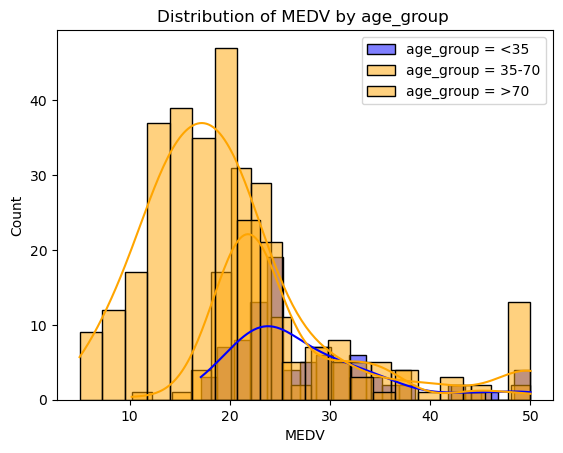

In [26]:
# check the normality of the feature CHAS 
younger= df[df['age_group'] == "35 and younger"]['MEDV']
middle= df[df['age_group'] == "35-70 years"]['MEDV']
older=df[df['age_group'] == "70 and older"]['MEDV']
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(younger, kde=True, color="blue", label="age_group = <35", bins=20)
sns.histplot(middle, kde=True, color="orange", label="age_group = 35-70", bins=20)
sns.histplot(older, kde=True, color="orange", label="age_group = >70", bins=20)
plt.legend()
plt.title("Distribution of MEDV by age_group ")
plt.show()

In [33]:
#check the normality of the age group in shapiro-wilk 

# Null Hypothesis (H₀): The data is normally distributed.
# Alternative Hypothesis (H₁): The data is not normally distributed.
    
print(shapiro(younger))
print(shapiro(middle))
print(shapiro(older))

ShapiroResult(statistic=0.8685954213142395, pvalue=1.8062446827116219e-07)
ShapiroResult(statistic=0.8358766436576843, pvalue=1.2511944258442043e-10)
ShapiroResult(statistic=0.8497464656829834, pvalue=5.001382270028269e-16)


In [32]:
# as the is not normally distributed so will have to go with non parametric test , 
# buts per central limit theoram if sample >30 it could be consider as normal
# checking the variance between the group 
#Null Hypothesis (H₀): The variances across groups are equal.
#Alternative Hypothesis (H₁): At least one group has a different variance.
levene(younger,middle,older,center="median")

LeveneResult(statistic=3.471820890881101, pvalue=0.031806778061338456)

In [36]:
#doing anova test by ols 
from statsmodels.formula.api import ols

lm_anova=ols("MEDV~ age_group",data=df).fit()
table=smf.stats.anova_lm(lm_anova)
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


In [39]:
#doing anova test by ols 
from statsmodels.formula.api import ols

lm_anova=ols("MEDV~ age_group",data=df).fit()
table=smf.stats.anova_lm(lm_anova,robust="hc3")
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


In [38]:
x_anova= pd.get_dummies(df[["age_group"]])


## add an intercept on x 
x_anova_1= smf.add_constant(x_anova)


# fitting model 
model_anova=smf.OLS(y_ttest,x_anova_1.astype(float)).fit()
prediction= model_anova.predict(x_anova_1)

model_anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     36.41
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           1.71e-15
Time:                        23:06:34   Log-Likelihood:                -1806.0
No. Observations:                 506   AIC:                             3618.
Df Residuals:                     503   BIC:                             3631.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       18.1292      0.321     56.399      0.000      17.498      18.761
age_group_35 and younger     9.6466      0.715     13.496      0.000       8.242      11.051
age_group_35-70 years        6.8184      0.627     10.875      0.000       5.587       8.050
age_group_70 and older       1.6642      0.482      3.451      0.001       0.717       2.612
==============================================================================
Omnibus:                      158.454   Durbin-Watson:                   0.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.356
Skew:                           1.592   Prob(JB):                     3.84e-86
Kurtosis:                       5.919   Cond. No.                     1.00e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.28e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
# doing anova by kruskal-wallis 
from scipy.stats import kruskal 

kruskal(younger,middle,older)



KruskalResult(statistic=121.60507259799651, pvalue=3.924587349574227e-27)

- as p value is less that alpha or level of significance so reject the null hypothesis their is a evidence that there is a difference in MEDV based on age group  and it is positively impacting the medv 
where we can found coefficient  9.6466 age group of 35 and youger means its impact is more in medv price that other two grps 

# 3 step) Correlation: Nitric Oxide (NOX) and Non-Retail Acres (INDUS)
- Hypothesis:

- Null Hypothesis : There is no linear relationship between NOX and INDUS.
- Alternate Hypothesis : There is a linear relationship.

In [41]:
# as the value is continous so using pearson corelation test 
from scipy.stats import pearsonr
pearsonr(df["NOX"],df["INDUS"])

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061242812e-98)

In [45]:
# doing in ols 
model=ols(formula="NOX~ INDUS",data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           7.91e-98
Time:                        23:41:50   Log-Likelihood:                 594.45
No. Observations:                 506   AIC:                            -1185.
Df Residuals:                     504   BIC:                            -1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4110      0.006     64.710      0.000       0.399       0.424
INDUS          0.0129      0.000     26.554      0.000       0.012       0.014
==============================================================================
Omnibus:                       35.023   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.995
Skew:                           0.548   Prob(JB):                     3.78e-11
Kurtosis:                       4.038   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- as the value of p is very less to level of signification 0.05 so reject the null hypothesis and there is a significant linear relationship betwwen Nitric Oxide (NOX) and Non-Retail Acres (INDUS)¶